                    Laboratorium 1 
 Ocena wpywu trendów liniowych na parametry zmienności rytmu serca

Martyna Toborek 
311843

Celem ćwiczenia jest sprawdzenie w jaki sposób trend wpływa na analizę interwału RR z zapisu sygnału EKG. 

Analizowane będą sygnały z 4 plików (chf201.txt_N.csv, chf202.txt_N.csv, nsr001.txt_N.csv, nsr002.txt_N.csv) z zapisem EKG rozpatrując trzy przedziały długości sygnału: 
1000 interwalow, 2000 interwalow, 5000 interwalow.

Następnie należy wyznaczyć parametry dziedziny czasu oraz częstotliwości i porównać je dla sygnału z trendem i bez trendu. 

Biblioteka, z której skorzystałam do analizy sygnału to biblioteka hrv. Do opracowania danych użyłam też bibliotek numpy oraz pandas.


In [246]:
import pandas as pd
import numpy as np

import hrv
from hrv.io import read_from_csv
from hrv.detrend import sg_detrend
from hrv.classical import frequency_domain

Poniższa funkcja to funkcja przepisana funkja time_domain z biblioteki hrv, z wprowadzonymi przeze mnie zmianami,  w postaci usunięcia niektórych niepotrzebnych wyliczanych parametrów. 

In [247]:
def time_dom(rri):
    diff_rri = np.diff(rri)
    rmssd = np.sqrt(np.mean(diff_rri ** 2)) 
    sdnn = np.std(rri, ddof=1) 
    pnn50 = sum(abs(np.diff(rri)) > 50)/ len(rri) * 100 
    mrri = np.mean(rri) 
    
    return dict(
        zip(
            ["rmssd", "sdnn", "pnn50", "mrri"],
            [rmssd, sdnn, pnn50, mrri],
        )
    )

Poniżej następuje pobranie danych z plików. 

In [248]:
data_1 = read_from_csv("chf201.txt_N.csv")
data_2 = read_from_csv("chf202.txt_N.csv")
data_3 = read_from_csv("nsr001.txt_N.csv")
data_4 = read_from_csv("nsr002.txt_N.csv")

a) 1000 interwałów

W poniższej komórce wycinam przedział danych, który będę analizować. 
Za pomocą wyżej zdefiniowanej funkcji wyliczam parametry w dziedzinie czasu, natomiast funkcja frequency_domain z biblioteki hrv wylicza parametry w dziedzinie częstotliwości. 

In [249]:
rri_1_10 = data_1.time_range(start=0, end=1000)
results_time_1_10 = time_dom(rri_1_10)
results_freq_1_10 = frequency_domain(rri=rri_1_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')


W poniższej komórce funkcją sg_detrend usuwam trend z wyznaczonego sygnału. Funkcja ta przepuszcza sygnał wejściowy przez dolnoprzepustowy filtr Savitzky-Golay. 
Następnie tymi samymi funkcjami wyznaczam parametry w dziedzinam czasu i częstotliwości.

In [250]:
cleaned_1_10 = sg_detrend(rri_1_10,  polyorder=3)
results_time_1_10c = time_dom(cleaned_1_10)
results_freq_1_10c = frequency_domain(rri=cleaned_1_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

Poniżej dane z trendem są przedstawione na wykresie 1 (niebieskim), natomiast na drugim (czerwonym) przedstawione są dane bez trendu.

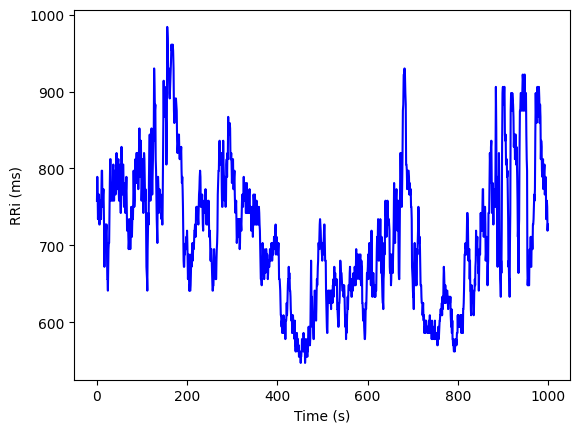

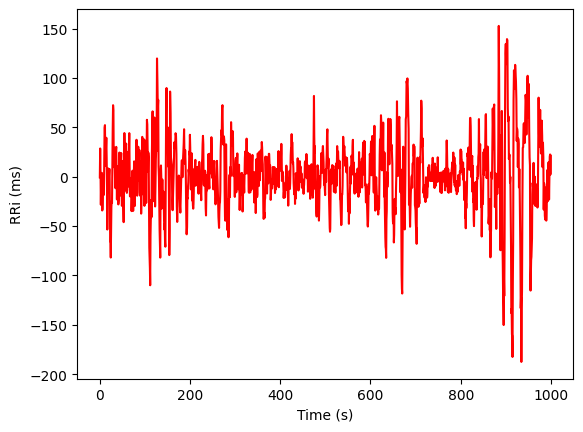

In [294]:
fig1, ax1 = rri_1_10.plot(color='b')
fig2, ax2 = cleaned_1_10.plot(color='r')

Każda poniższa analiza wygląda analogicznie jak opisana powyżej.

In [252]:
rri_2_10 = data_2.time_range(start=0, end=1000)
results_time_2_10 = time_dom(rri_2_10)
results_freq_2_10 = frequency_domain(rri=rri_2_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [253]:
cleaned_2_10 = sg_detrend(rri_2_10,  polyorder=3)
results_time_2_10c = time_dom(cleaned_2_10)
results_freq_2_10c = frequency_domain(rri=cleaned_2_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [254]:
#fig1_2, ax1_2 = rri_2_10.plot(color='b')
#fig2_2, ax2_2 = cleaned_2_10.plot(color='r')

In [255]:
rri_3_10 = data_3.time_range(start=0, end=1000)
results_time_3_10 = time_dom(rri_3_10)
results_freq_3_10 = frequency_domain(rri=rri_3_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [256]:
cleaned_3_10 = sg_detrend(rri_3_10,  polyorder=3)
results_time_3_10c = time_dom(cleaned_3_10)
results_freq_3_10c = frequency_domain(rri=cleaned_3_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [257]:
#fig1_3, ax1_3 = rri_3_10.plot(color='b')
#fig2_3, ax2_3 = cleaned_3_10.plot(color='r')

In [258]:
rri_4_10 = data_4.time_range(start=0, end=1000)
results_time_4_10 = time_dom(rri_4_10)
results_freq_4_10 = frequency_domain(rri=rri_4_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [259]:
cleaned_4_10 = sg_detrend(rri_4_10,  polyorder=3)
results_time_4_10c = time_dom(cleaned_4_10)
results_freq_4_10c = frequency_domain(rri=cleaned_4_10, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [260]:
#fig1_4, ax1_4 = rri_4_10.plot(color='b')
#fig2_4, ax2_4 = cleaned_4_10.plot(color='r')

Poniżej wszystkie dane są zebrane w jedną tabele dla podpunktu a). Analogicznie jest to przedstawione na końcu dla pozostałych podpunktów.

In [261]:
rt1_1 = pd.DataFrame.from_dict(results_time_1_10, orient='index', columns=['chf201 - data'])
rt1_1c = pd.DataFrame.from_dict(results_time_1_10c, orient='index', columns=['chf201 - detrended data'])
rt2_1 = pd.DataFrame.from_dict(results_time_2_10, orient='index', columns=['chf202 - data'])
rt2_1c = pd.DataFrame.from_dict(results_time_2_10c, orient='index', columns=['chf202 - detrended data'])
rt3_1 = pd.DataFrame.from_dict(results_time_3_10, orient='index', columns=['nsr001 - data'])
rt3_1c = pd.DataFrame.from_dict(results_time_3_10c, orient='index', columns=['nsr001 - detrended data'])
rt4_1 = pd.DataFrame.from_dict(results_time_4_10, orient='index', columns=['nsr002 - data'])
rt4_1c = pd.DataFrame.from_dict(results_time_4_10c, orient='index', columns=['nsr002 - detrended data'])
rf1_1 = pd.DataFrame.from_dict(results_freq_1_10, orient='index', columns=['chf201 - data'])
rf1_1c = pd.DataFrame.from_dict(results_freq_1_10c, orient='index', columns=['chf201 - detrended data'])
rf2_1 = pd.DataFrame.from_dict(results_freq_2_10, orient='index', columns=['chf202 - data'])
rf2_1c = pd.DataFrame.from_dict(results_freq_2_10c, orient='index', columns=['chf202 - detrended data'])
rf3_1 = pd.DataFrame.from_dict(results_freq_3_10, orient='index', columns=['nsr001 - data'])
rf3_1c = pd.DataFrame.from_dict(results_freq_3_10c, orient='index', columns=['nsr001 - detrended data'])
rf4_1 = pd.DataFrame.from_dict(results_freq_4_10, orient='index', columns=['nsr002 - data'])
rf4_1c = pd.DataFrame.from_dict(results_freq_4_10c, orient='index', columns=['nsr002 - detrended data'])
r12=pd.concat([rf1_1, rf1_1c, rf2_1, rf2_1c, rf3_1, rf3_1c, rf4_1, rf4_1c], axis = 1)
r11=pd.concat([rt1_1, rt1_1c, rt2_1, rt2_1c, rt3_1, rt3_1c, rt4_1, rt4_1c], axis = 1)
rr1 = r1.append(r2)
rr1

C:\Users\tynka\AppData\Local\Temp\ipykernel_13764\239357648.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rr1 = r1.append(r2)


chf201 - data  chf201 - detrended data  chf202 - data  \
rmssd            23.161938                22.997391      58.292532   
sdnn             87.961495                35.020678      58.301223   
pnn50             3.307530                 3.518649       2.158693   
mrri            703.992259                -0.024375     583.377480   
total_power    1815.000922              1005.370789    5129.785108   
vlf             950.189715                94.517813     450.303836   
lf              679.620963               726.170335    2018.289405   
hf              185.190244               184.682641    2661.191866   
lf_hf             3.669853                 3.931990       0.758416   
lfnu             78.586049                79.724210      43.130623   
hfnu             21.413951                20.275790      56.869377   

             chf202 - detrended data  nsr001 - data  nsr001 - detrended data  \
rmssd                      58.307434      15.643304                15.702168   
sdnn                       40.241305      55.244253                22.348671   
pnn50                       2.100350       0.495663                 0.557621   
mrri                       -0.060843     619.799257                 0.009273   
total_power              5022.753113     647.408881               435.290656   
vlf                       362.613550     269.215836                10.704559   
lf                       1992.833605     340.856807               387.632674   
hf                       2667.305957      37.336238                36.953423   
lf_hf                       0.747133       9.129383                10.489764   
lfnu                       42.763389      90.127730                91.296601   
hfnu                       57.236611       9.872270                 8.703399   

             nsr002 - data  nsr002 - detrended data  
rmssd            18.877654                18.685586  
sdnn             73.434460                29.795775  
pnn50             1.368760                 1.368760  
mrri            805.341385                 0.008181  
total_power    1166.203460               836.117015  
vlf             361.354915                30.332812  
lf              749.226821               749.538088  
hf               55.621723                56.246116  
lf_hf            13.470040                13.326042  
lfnu             93.089169                93.019705  
hfnu              6.910831                 6.980295

b) 2000 interwałów

In [262]:
rri_1_20 = data_1.time_range(start=0, end=2000)
results_time_1_20 = time_dom(rri_1_20)
results_freq_1_20 = frequency_domain(rri=rri_1_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [263]:
cleaned_1_20 =  sg_detrend(rri_1_20,  polyorder=3)
results_time_1_20c = time_dom(cleaned_1_20)
results_freq_1_20c = frequency_domain(rri=cleaned_1_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [264]:
#fig1_5, ax1_5 = rri_1_20.plot(color='b')
#fig2_5, ax2_5 = cleaned_1_20.plot(color='r')

In [265]:
rri_2_20 = data_2.time_range(start=0, end=2000)
results_time_2_20 = time_dom(rri_2_20)
results_freq_2_20 = frequency_domain(rri=rri_2_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [266]:
cleaned_2_20 =  sg_detrend(rri_2_20,  polyorder=3)
results_time_2_20c = time_dom(cleaned_2_20)
results_freq_2_20c = frequency_domain(rri=cleaned_2_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [267]:
#fig1_6, ax1_6 = rri_2_20.plot(color='b')
#fig2_6, ax2_6 = cleaned_2_20.plot(color='r')

In [268]:
rri_3_20 = data_3.time_range(start=0, end=2000)
results_time_3_20 = time_dom(rri_3_20)
results_freq_3_20 = frequency_domain(rri=rri_3_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [269]:
cleaned_3_20 =  sg_detrend(rri_3_20,  polyorder=3)
results_time_3_20c = time_dom(cleaned_3_20)
results_freq_3_20c = frequency_domain(rri=cleaned_3_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [270]:
#fig1_7, ax1_7 = rri_3_20.plot(color='b')
#fig2_7, ax2_7 = cleaned_3_20.plot(color='r')

In [271]:
rri_4_20 = data_4.time_range(start=0, end=2000)
results_time_4_20 = time_dom(rri_4_20)
results_freq_4_20 = frequency_domain(rri=rri_4_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [272]:
cleaned_4_20 =  sg_detrend(rri_4_20,  polyorder=3)
results_time_4_20c = time_dom(cleaned_4_20)
results_freq_4_20c = frequency_domain(rri=cleaned_4_20, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [273]:
#fig1_8, ax1_8 = rri_4_20.plot(color='b')
#fig2_8, ax2_8 = cleaned_4_20.plot(color='r')

In [274]:
rt1_2 = pd.DataFrame.from_dict(results_time_1_20, orient='index', columns=['chf201 - data'])
rt1_2c = pd.DataFrame.from_dict(results_time_1_20c, orient='index', columns=['chf201 - detrended data'])
rt2_2 = pd.DataFrame.from_dict(results_time_2_20, orient='index', columns=['chf202 - data'])
rt2_2c = pd.DataFrame.from_dict(results_time_2_20c, orient='index', columns=['chf202 - detrended data'])
rt3_2 = pd.DataFrame.from_dict(results_time_3_20, orient='index', columns=['nsr001 - data'])
rt3_2c = pd.DataFrame.from_dict(results_time_3_20c, orient='index', columns=['nsr001 - detrended data'])
rt4_2 = pd.DataFrame.from_dict(results_time_4_20, orient='index', columns=['nsr002 - data'])
rt4_2c = pd.DataFrame.from_dict(results_time_4_20c, orient='index', columns=['nsr002 - detrended data'])
rf1_2 = pd.DataFrame.from_dict(results_freq_1_20, orient='index', columns=['chf201 - data'])
rf1_2c = pd.DataFrame.from_dict(results_freq_1_20c, orient='index', columns=['chf201 - detrended data'])
rf2_2 = pd.DataFrame.from_dict(results_freq_2_20, orient='index', columns=['chf202 - data'])
rf2_2c = pd.DataFrame.from_dict(results_freq_2_20c, orient='index', columns=['chf202 - detrended data'])
rf3_2 = pd.DataFrame.from_dict(results_freq_3_20, orient='index', columns=['nsr001 - data'])
rf3_2c = pd.DataFrame.from_dict(results_freq_3_20c, orient='index', columns=['nsr001 - detrended data'])
rf4_2 = pd.DataFrame.from_dict(results_freq_4_20, orient='index', columns=['nsr002 - data'])
rf4_2c = pd.DataFrame.from_dict(results_freq_4_20c, orient='index', columns=['nsr002 - detrended data'])
r22=pd.concat([rf1_2, rf1_2c, rf2_2, rf2_2c, rf3_2, rf3_2c, rf4_2, rf4_2c], axis = 1)
r12=pd.concat([rt1_2, rt1_2c, rt2_2, rt2_2c, rt3_2, rt3_2c, rt4_2, rt4_2c], axis = 1)
rr2 = r12.append(r22)
rr2

C:\Users\tynka\AppData\Local\Temp\ipykernel_13764\1215240706.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rr2 = r12.append(r22)


chf201 - data  chf201 - detrended data  chf202 - data  \
rmssd            26.626752                26.441338      43.971151   
sdnn             97.005948                38.686314      50.067818   
pnn50             6.170531                 6.432311       1.448401   
mrri            748.217651                 0.004827     603.531080   
total_power    2393.736959              1193.696676    2697.897331   
vlf            1379.602753               136.156246     285.371048   
lf              751.313410               793.850342    1018.015227   
hf              262.820796               263.690087    1394.511057   
lf_hf             2.858653                 3.010543       0.730016   
lfnu             74.084219                75.065720      42.197063   
hfnu             25.915781                24.934280      57.802937   

             chf202 - detrended data  nsr001 - data  nsr001 - detrended data  \
rmssd                      43.969737      14.498509                14.528755   
sdnn                       31.116979      67.692985                16.933745   
pnn50                       1.418226       0.309772                 0.337933   
mrri                       -0.029385     563.278795                -0.002454   
total_power              2579.669845     409.087959               244.380382   
vlf                       179.710937     190.731075                 5.767484   
lf                       1002.603504     193.085674               213.419483   
hf                       1397.355404      25.271210                25.193415   
lf_hf                       0.717501       7.640539                 8.471241   
lfnu                       41.775861      88.426648                89.441721   
hfnu                       58.224139      11.573352                10.558279   

             nsr002 - data  nsr002 - detrended data  
rmssd            17.410023                17.310102  
sdnn             75.757083                27.806986  
pnn50             0.936403                 0.897386  
mrri            780.446352                 0.004215  
total_power    1016.770958               690.529634  
vlf             386.685675                26.284723  
lf              583.665355               617.521534  
hf               46.419927                46.723378  
lf_hf            12.573595                13.216543  
lfnu             92.632755                92.965941  
hfnu              7.367245                 7.034059

c) 5000 interwałów

In [288]:
rri_1_50 = data_1.time_range(start=0, end=5000)
results_time_1_50 = time_dom(rri_1_50)
results_freq_1_50 = frequency_domain(rri=rri_1_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [276]:
cleaned_1_50 = sg_detrend(rri_1_50,  polyorder=3)
results_time_1_50c = time_dom(cleaned_1_50)
results_freq_1_50c = frequency_domain(rri=cleaned_1_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [277]:
#fig1_9, ax1_9 = rri_1_50.plot(color='b')
#fig2_9, ax2_9 = cleaned_1_50.plot(color='r')

In [278]:
rri_2_50 = data_2.time_range(start=0, end=5000)
results_time_2_50 = time_dom(rri_2_50)
results_freq_2_50 = frequency_domain(rri=rri_2_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [279]:
cleaned_2_50 =  sg_detrend(rri_2_50,  polyorder=3)
results_time_2_50c = time_dom(cleaned_2_50)
results_freq_2_50c = frequency_domain(rri=cleaned_2_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [280]:
#fig1_10, ax1_10 = rri_2_50.plot(color='b')
#fig2_10, ax2_10 = cleaned_2_50.plot(color='r')

In [281]:
rri_3_50 = data_3.time_range(start=0, end=5000)
results_time_3_50 = time_dom(rri_3_50)
results_freq_3_50 = frequency_domain(rri=rri_3_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [282]:
cleaned_3_50 =  sg_detrend(rri_3_50,  polyorder=3)
results_time_3_50c = time_dom(cleaned_3_50)
results_freq_3_50c = frequency_domain(rri=cleaned_3_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [283]:
#fig1_11, ax1_11 = rri_3_50.plot(color='b')
#fig2_11, ax2_11 = cleaned_3_50.plot(color='r')

In [284]:
rri_4_50 = data_4.time_range(start=0, end=5000)
results_time_4_50 = time_dom(rri_4_50)
results_freq_4_50 = frequency_domain(rri=rri_4_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [285]:
cleaned_4_50 =  sg_detrend(rri_4_50,  polyorder=3)
results_time_4_50c = time_dom(cleaned_4_50)
results_freq_4_50c = frequency_domain(rri=cleaned_4_50, fs=4.0, method='welch', interp_method='cubic',
    detrend='linear')

In [286]:
#fig1_12, ax1_12 = rri_4_50.plot(color='b')
#fig2_12, ax2_12 = cleaned_4_50.plot(color='r')

In [289]:
rt1_5 = pd.DataFrame.from_dict(results_time_1_50, orient='index', columns=['chf201 - data'])
rt1_5c = pd.DataFrame.from_dict(results_time_1_50c, orient='index', columns=['chf201 - detrended data'])
rt2_5 = pd.DataFrame.from_dict(results_time_2_50, orient='index', columns=['chf202 - data'])
rt2_5c = pd.DataFrame.from_dict(results_time_2_50c, orient='index', columns=['chf202 - detrended data'])
rt3_5 = pd.DataFrame.from_dict(results_time_3_50, orient='index', columns=['nsr001 - data'])
rt3_5c = pd.DataFrame.from_dict(results_time_3_50c, orient='index', columns=['nsr001 - detrended data'])
rt4_5 = pd.DataFrame.from_dict(results_time_4_50, orient='index', columns=['nsr002 - data'])
rt4_5c = pd.DataFrame.from_dict(results_time_4_50c, orient='index', columns=['nsr002 - detrended data'])
rf1_5 = pd.DataFrame.from_dict(results_freq_1_50, orient='index', columns=['chf201 - data'])
rf1_5c = pd.DataFrame.from_dict(results_freq_1_50c, orient='index', columns=['chf201 - detrended data'])
rf2_5 = pd.DataFrame.from_dict(results_freq_2_50, orient='index', columns=['chf202 - data'])
rf2_5c = pd.DataFrame.from_dict(results_freq_2_50c, orient='index', columns=['chf202 - detrended data'])
rf3_5 = pd.DataFrame.from_dict(results_freq_3_50, orient='index', columns=['nsr001 - data'])
rf3_5c = pd.DataFrame.from_dict(results_freq_3_50c, orient='index', columns=['nsr001 - detrended data'])
rf4_5 = pd.DataFrame.from_dict(results_freq_4_50, orient='index', columns=['nsr002 - data'])
rf4_5c = pd.DataFrame.from_dict(results_freq_4_50c, orient='index', columns=['nsr002 - detrended data'])
r25=pd.concat([rf1_5, rf1_5c, rf2_5, rf2_5c, rf3_5, rf3_5c, rf4_5, rf4_5c], axis = 1)
r15=pd.concat([rt1_5, rt1_5c, rt2_5, rt2_5c, rt3_5, rt3_5c, rt4_5, rt4_5c], axis = 1)
rr5 = r15.append(r25)
rr5

C:\Users\tynka\AppData\Local\Temp\ipykernel_13764\1466637202.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rr5 = r15.append(r25)


chf201 - data  chf201 - detrended data  chf202 - data  \
rmssd            25.132378                24.925182      65.181899   
sdnn             98.687318                35.385863      59.761088   
pnn50             4.472700                 4.622289       1.394122   
mrri            748.008227                -0.019462     628.038558   
total_power    2026.828645               982.235913    9005.224030   
vlf            1190.184503               117.400143    1152.783842   
lf              618.936231               646.522225    4233.803737   
hf              217.707911               218.313545    3618.636451   
lf_hf             2.842966                 2.961439       1.170000   
lfnu             73.978434                74.756647      53.917045   
hfnu             26.021566                25.243353      46.082955   

             chf202 - detrended data  nsr001 - data  nsr001 - detrended data  \
rmssd                      65.183847      14.306251                14.284795   
sdnn                       45.720713      68.729271                15.519857   
pnn50                       1.381562       0.264042                 0.276044   
mrri                       -0.009102     600.168627                 0.000340   
total_power              8772.625071     314.619816               185.537747   
vlf                       894.783342     143.391197                 4.517073   
lf                       4261.150189     145.395615               155.125101   
hf                       3616.691540      25.833004                25.895573   
lf_hf                       1.178190       5.628289                 5.990410   
lfnu                       54.090325      84.913151                85.694688   
hfnu                       45.909675      15.086849                14.305312   

             nsr002 - data  nsr002 - detrended data  
rmssd            74.723605                74.729832  
sdnn             83.645957                57.054322  
pnn50             0.776759                 0.807830  
mrri            776.826161                 0.003397  
total_power   23307.054396             23331.869061  
vlf            5081.280156              4985.859309  
lf            14874.035423             14987.602571  
hf             3351.738817              3358.407180  
lf_hf             4.437707                 4.462712  
lfnu             81.609896                81.694073  
hfnu             18.390104                18.305927

Analiza poszczególnych parametrów:

Dziedzina czasu:

Średnia wartość interwałów RR (mrri) dla sygnału bez trendu jest bardzo różna względem sygnału oryginalnego, co zgadza się z oczekiwaniami. Wartości te oscylują wokół 0.

Wartości odchylenia standardowego dla sygnałów (sdnn) bez trendu różnią się znacznie od tych wartości dla sygnału z trendem.   

Wartości pierwiastka kwadratowego ze średniej kwadratów różnic między odstępami RR (rmssd) dla sygnału z trendem i bez trendu sa takie same, lub bardzo bliskie sobie.

Różnice wartości procentowych różnic między interwałami RR przekraczającymi 50 ms (pnn50) są bardzo niewielkie, zazwyczaj rzędu 10^(-1)

Dziedzina częstotliwości:

Moc VLF  dla sygnału bez trendu jest znacznie mniejsza niż dla sygnału z trendem. Dla plików chf201, nsr001 i nsr002(dla przedziałów 1000 i 2000) różnice sięgają rzędu wielkości w dół. Dla pliku chf202 różnice są mniejsze, jednak wciąż widocze. 

Moc LF dla sygnału z trendem jest mniejsza od mocy dla sygnału bez trendu. Są to niewielkie różnice, jednak widoczne. Jedynie dla pliku chf202 dla zakresów 1000 i 2000 te wartości są bliskie sobie. 

Wartości mocy HF dla obu sygnałów są sobie bardzo bliskie. 

Wartości całkowitej mocy różnią się od siebie znacznie. Jednak różnice te zmniejszają się widocznie wraz z powiększeniem zakresu - dla zakresu 5000 róznice te są najmniejsze.

Stosunki mocy LF do mocy HF dla sygnałów bez trendu i z trendem różnią się od siebie, jednak różnice te zmniejszają się wraz z powiększeniem zakresu sygnału - dla zakresu 5000 różnice te są najmniejsze.  





Wnioski:

Po analizie wyznaczonych parametrów mogę stwierdzić, że najmniej różnic względem sygnału oryginalnego występuje dla sygnału bez trendu o największym zakresie, czyli 5000 interwałów. Jest to szczególnie widoczne po parametrach w dziedzinie częstotliwości (stosunek LF/HF oraz całkowita moc). 

Pozbycie się trendu z sygnału najbardziej wpływa na wartości odchylenia standardowego, mocy LF oraz mocy VLF. Pozostałe wartościo są bliskie lub rózne sobie. 